In [1]:
%pip install yfinance

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import datetime

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
#Fetching data
startdate=datetime.datetime(2020,1,1)
enddate=datetime.datetime(2025,1,1)
tickers=['AAPL','GOOG','GS','MS','XOM']
data=yf.download(tickers,start=startdate,end=enddate)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  5 of 5 completed


In [4]:
data

Price            Close                                                  \
Ticker            AAPL        GOOG          GS          MS         XOM   
Date                                                                     
2020-01-02   72.620827   68.046196  205.282959   43.632931   54.634777   
2020-01-03   71.914818   67.712273  202.882492   42.928638   54.195538   
2020-01-06   72.487854   69.381874  204.958801   42.777718   54.611664   
2020-01-07   72.146935   69.338585  206.307953   42.693874   54.164726   
2020-01-08   73.307518   69.884987  208.296616   43.238869   53.347897   
...                ...         ...         ...         ...         ...   
2024-12-24  257.578674  197.345184  577.038086  125.215454  104.494308   
2024-12-26  258.396667  196.875717  575.493469  126.171379  104.582695   
2024-12-27  254.974930  193.819183  570.493408  124.919815  104.572876   
2024-12-30  251.593094  192.470734  567.889282  123.924477  103.865776   
2024-12-31  249.817383  190.223282  566.968506  123.894913  105.643356   

Price             High                                                  ...  \
Ticker            AAPL        GOOG          GS          MS         XOM  ...   
Date                                                                    ...   
2020-01-02   72.681274   68.084512  205.563297   43.649700   54.727244  ...   
2020-01-03   72.676447   68.301485  203.784853   43.138251   54.996951  ...   
2020-01-06   72.526541   69.495829  205.020133   42.794487   54.989251  ...   
2020-01-07   72.753816   69.818809  208.305413   42.920256   54.341959  ...   
2020-01-08   73.609752   70.246275  210.040018   43.423329   54.164719  ...   
...                ...         ...         ...         ...         ...  ...   
2024-12-24  257.588630  197.445061  577.038086  125.373135  105.270160  ...   
2024-12-26  259.474086  197.934509  576.840093  126.309346  105.113024  ...   
2024-12-27  258.077462  196.576052  576.216392  126.003845  106.055825  ...   
2024-12-30  252.889969  193.559490  570.334936  124.328528  104.651443  ...   
2024-12-31  252.670501  193.030082  571.226055  124.988799  105.967448  ...   

Price             Open                                                  \
Ticker            AAPL        GOOG          GS          MS         XOM   
Date                                                                     
2020-01-02   71.627077   66.761282  202.374369   42.928633   54.126185   
2020-01-03   71.847118   67.075290  202.900017   42.945408   54.973828   
2020-01-06   71.034717   67.181792  201.436958   42.484258   54.187837   
2020-01-07   72.497522   69.567504  205.878669   42.794491   54.326549   
2020-01-08   71.849540   69.275865  206.474369   42.727414   54.026013   
...                ...         ...         ...         ...         ...   
2024-12-24  254.875189  195.946768  568.532899  123.254345  104.612154   
2024-12-26  257.568678  196.516126  572.443911  124.693155  104.612156   
2024-12-27  257.209530  196.246426  571.305322  125.205606  104.396100   
2024-12-30  251.623020  190.647813  561.671295  122.741900  104.396105   
2024-12-31  251.832526  192.226005  569.394338  124.496058  104.268430   

Price          Volume                                        
Ticker           AAPL      GOOG       GS       MS       XOM  
Date                                                         
2020-01-02  135480400  28132000  3736300  7808000  12456400  
2020-01-03  146322800  23728000  2274500  6706000  17386900  
2020-01-06  118387200  34646000  3329300  7476700  20081900  
2020-01-07  108872000  30054000  5255200  4538100  17387700  
2020-01-08  132079200  30560000  3564700  6185200  15137700  
...               ...       ...      ...      ...       ...  
2024-12-24   23234700   6809800   913400  2902800   7807000  
2024-12-26   27237100   7907900  1092000  3013500   9652400  
2024-12-27   42355300  14693000  1486000  3088100  11943900  
2024-12-30   35557500  12209500  1265900  2637900  11080800  
2024-12-31   

In [6]:
#Data Cleaning and Exploration
#Normalisation
normalised_data=(data['Close']/data['Close'].iloc[0]*100)


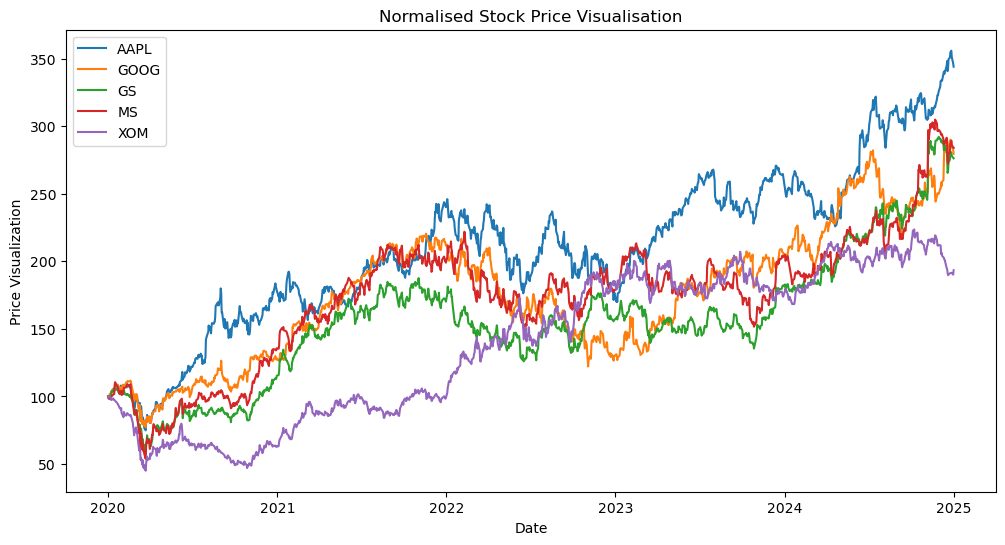

In [ ]:
#Visualisation
plt.figure(figsize=(12,6))
for ticker in tickers:
    plt.plot(normalised_data[ticker],label=ticker)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Price Visualization')
plt.title('Normalised Stock Price Visualisation')
plt.show()

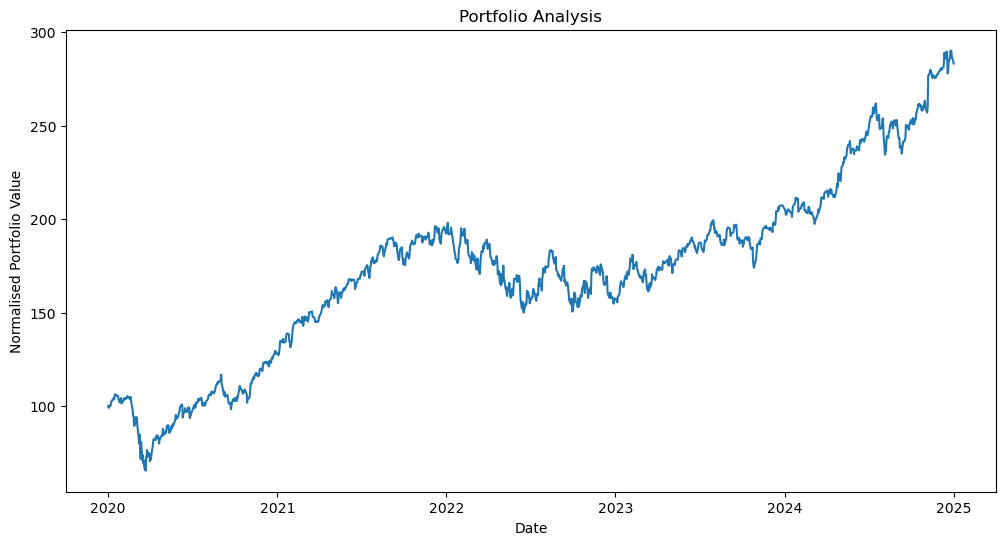

In [8]:
#Portfolio Analysis
weights=[0.2,0.3,0.3,0.1,0.1]

portfolio=normalised_data['AAPL']*weights[0]+normalised_data['GOOG']*weights[1]+normalised_data['GS']*weights[2]+normalised_data['MS']*weights[3]+normalised_data['XOM']*weights[4]


plt.figure(figsize=(12,6))
plt.plot(portfolio)
plt.xlabel('Date')
plt.ylabel('Normalised Portfolio Value')
plt.title('Portfolio Analysis') 
plt.show()

In [ ]:
#Portfolio Returns
returns=portfolio.iloc[-1]-portfolio.iloc[0]
print('Net returns=',returns,'%')

print('CAGR:',(pow(portfolio.iloc[-1]/portfolio.iloc[0],0.2)-1)*100)

Net returns= 183.25327786094994 %
CAGR: 23.15016239272678


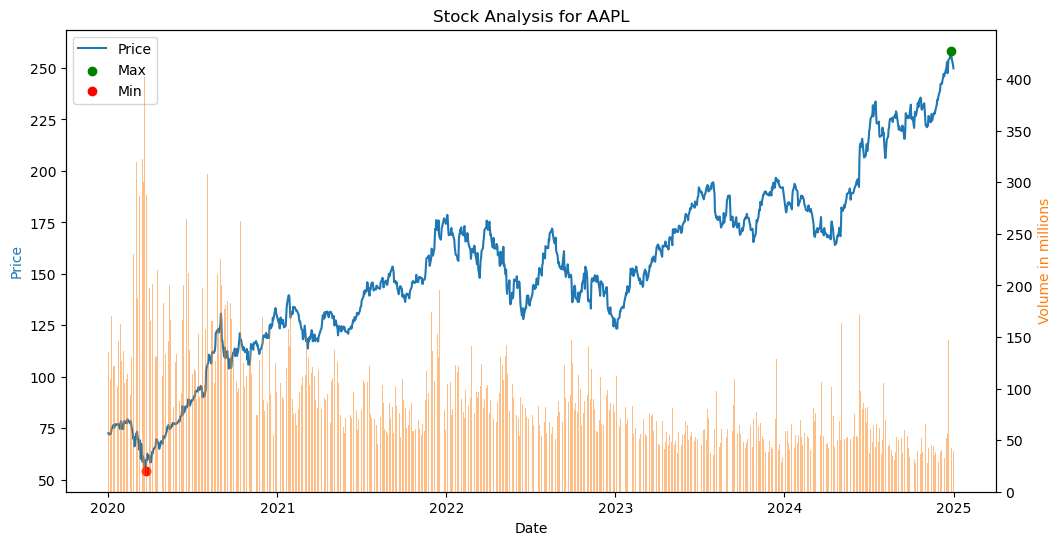

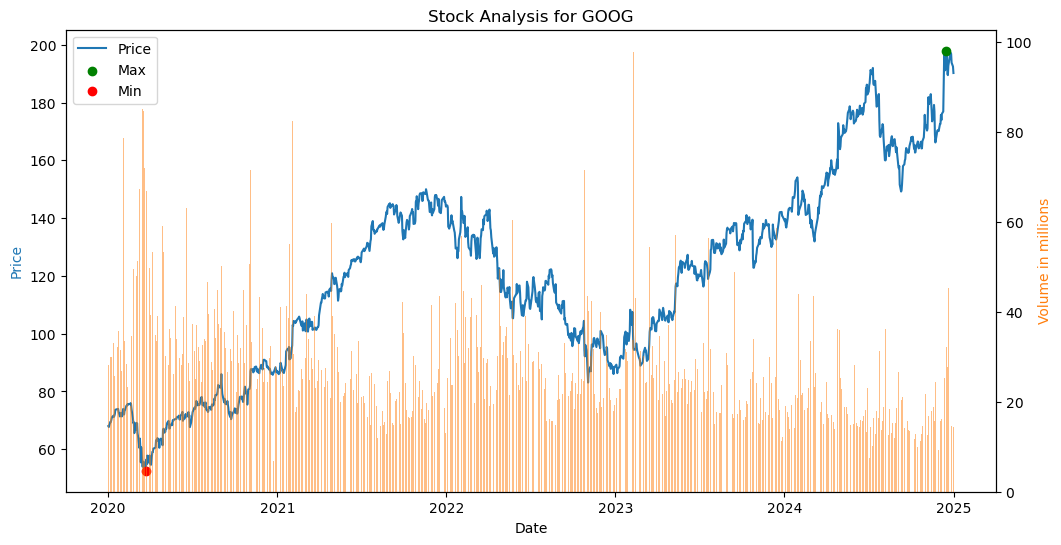

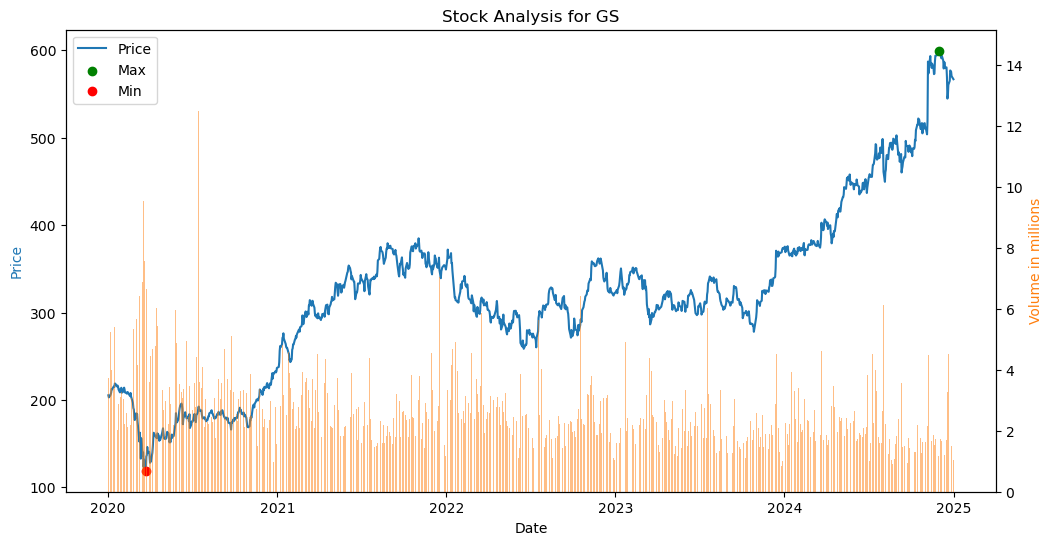

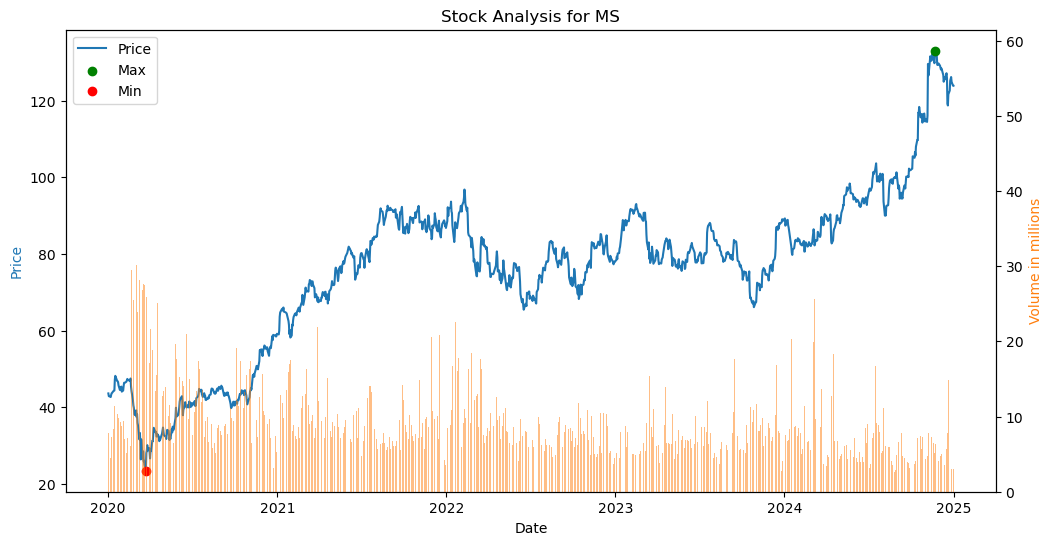

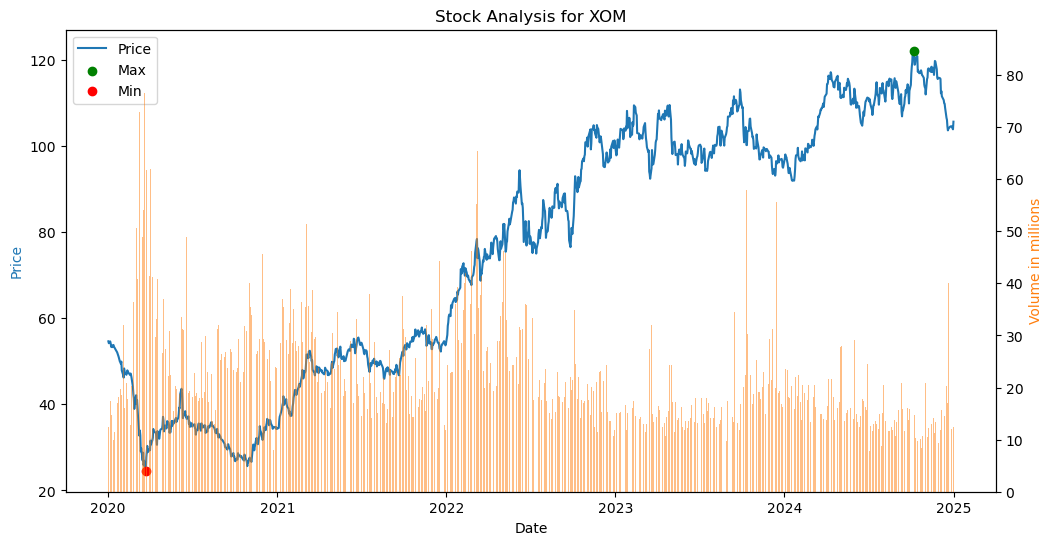

In [ ]:
#Individual Stock Analysis
for ticker in tickers:
    fig,ax1=plt.subplots(figsize=(12,6))
    ax2=ax1.twinx()
    
    ax1.plot(data['Close'][ticker],color='tab:blue',label='Price')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Price',color='tab:blue')
    #Plots Volume
    ax2.bar(data.index,data['Volume'][ticker]/1e6,color='tab:orange',label='Volume',alpha=0.5)
    ax2.set_ylabel('Volume in millions',color='tab:orange')
    #Plots Max and Min
    max_index=data['Close'][ticker].idxmax()
    min_index=data['Close'][ticker].idxmin()
    ax1.scatter(max_index,data['Close'][ticker].max(),color='g',label='Max',zorder=5)
    ax1.scatter(min_index,data['Close'][ticker].min(),color='r',label='Min',zorder=5)
    
    plt.title('Stock Analysis for '+ticker)
    handles, labels = ax1.get_legend_handles_labels()
    ax1.legend(handles, labels, loc='upper left')
    plt.show()